<a href="https://colab.research.google.com/github/tony1966/colab/blob/main/deep_learning_illustrated_ch5_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
np.set_printoptions(linewidth=np.inf)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [11]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

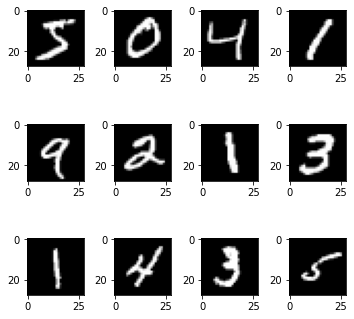

In [14]:
plt.figure(figsize=(5, 5))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap='gray')
plt.tight_layout()
plt.show()

In [16]:
X_train=X_train.reshape(60000, 784).astype('float32')
X_test=X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.       

In [19]:
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
model=Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(loss='mean_squared_error',
       optimizer=optimizers.SGD(learning_rate=0.01),
       metrics='accuracy')

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1,
     validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 3s 4ms/step - loss: 0.0960 - accuracy: 0.0974 - val_loss: 0.0926 - val_accuracy: 0.0982
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0918 - accuracy: 0.0980 - val_loss: 0.0911 - val_accuracy: 0.1009
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0908 - accuracy: 0.1031 - val_loss: 0.0905 - val_accuracy: 0.1096
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1228
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.1273 - val_loss: 0.0897 - val_accuracy: 0.1378
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.1462 - val_loss: 0.0893 - val_accuracy: 0.1641
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0893 - accuracy: 0.1728 - val_loss: 0.0890 - val_accuracy: 0.1965